In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
root_path = r"/home/check/DATA/university/yr3, hk1/DS102 - ML for Statistic/Đồ án/goodread/DS102"

In [4]:
df = pd.read_csv(root_path + '/DATA/silver/silver_1.csv')

In [5]:
print(f"Shape: {df.shape}")

Shape: (2133244, 24)


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133244 entries, 0 to 2133243
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   title              object 
 1   author             object 
 2   year               int64  
 3   total_weeks        int64  
 4   first_week         object 
 5   debut_rank         int64  
 6   best_rank          int64  
 7   week               object 
 8   rank               int64  
 9   Author_Rating      object 
 10  Genre              object 
 11  Gross_Sales        float64
 12  Publisher_Revenue  float64
 13  Sale_Price         float64
 14  Sales_Rank         int64  
 15  Units_Sold         int64  
 16  publication_year   int64  
 17  average_rating     float64
 18  ratings_count      int64  
 19  description        object 
 20  rating             float64
 21  review_text        object 
 22  n_votes            float64
 23  date_added         object 
dtypes: float64(6), int64(9), object(9)
memory usage: 3

In [7]:
df.describe()

,year,total_weeks,debut_rank,best_rank,rank,Gross_Sales,Publisher_Revenue,Sale_Price,Sales_Rank,Units_Sold,publication_year,average_rating,ratings_count,rating,n_votes
count,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06,2.133244e+06
mean,1.999959e+03,2.212072e+01,8.211611e+00,2.934313e+00,7.236687e+00,4.775105e+03,2.463579e+03,4.480116e+00,5.254829e+02,8.432157e+03,2.006966e+03,3.819487e+00,7.390078e+04,3.627548e+00,1.053304e+00
std,1.718807e+01,1.757615e+01,4.255281e+00,3.078161e+00,4.551340e+00,1.174413e+04,7.089159e+03,3.220638e+00,4.005812e+02,1.508188e+04,9.066907e+00,2.922784e-01,4.983289e+04,1.282155e+00,9.320169e+00
min,1.932000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.049400e+02,0.000000e+00,9.900000e-01,1.000000e+00,1.060000e+02,1.880000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00
25%,1.986000e+03,9.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.138200e+02,0.000000e+00,9.900000e-01,2.020000e+02,4.180000e+02,2.002000e+03,3.650000e+00,1.513000e+04,3.000000e+00,0.000000e+00
50%,2.006000e+03,1.800000e+01,8.000000e+00,1.000000e+00,7.000000e+00,8.167500e+02,1.937520e+02,3.990000e+00,4.760000e+02,2.800000e+03,2.010000e+03,3.850000e+00,8.165200e+04,4.000000e+00,0.000000e+00
75%,2.013000e+03,3.300000e+01,1.100000e+01,4.000000e+00,1.100000e+01,1.850700e+03,8.080560e+02,6.990000e+00,8.230000e+02,5.427000e+03,2.014000e+03,4.030000e+00,1.113010e+05,5.000000e+00,0.000000e+00
max,2.020000e+03,1.650000e+02,1.600000e+01,1.600000e+01,1.700000e+01,4.779500e+04,2.867700e+04,1.798000e+01,1.272000e+03,5.896800e+04,2.102000e+03,5.000000e+00,1.753180e+05,5.000000e+00,1.041000e+03


In [8]:
num_cols = ['year', 'total_weeks', 'debut_rank', 'best_rank', 'rank', 
            'Gross_Sales', 'Publisher_Revenue', 'Sale_Price', 'Sales_Rank', 
            'Units_Sold', 'publication_year', 'average_rating', 'ratings_count', 
            'rating', 'n_votes']

cat_cols = ['Author_Rating', 'Genre']

text_cols = ['title', 'author', 'description', 'review_text']

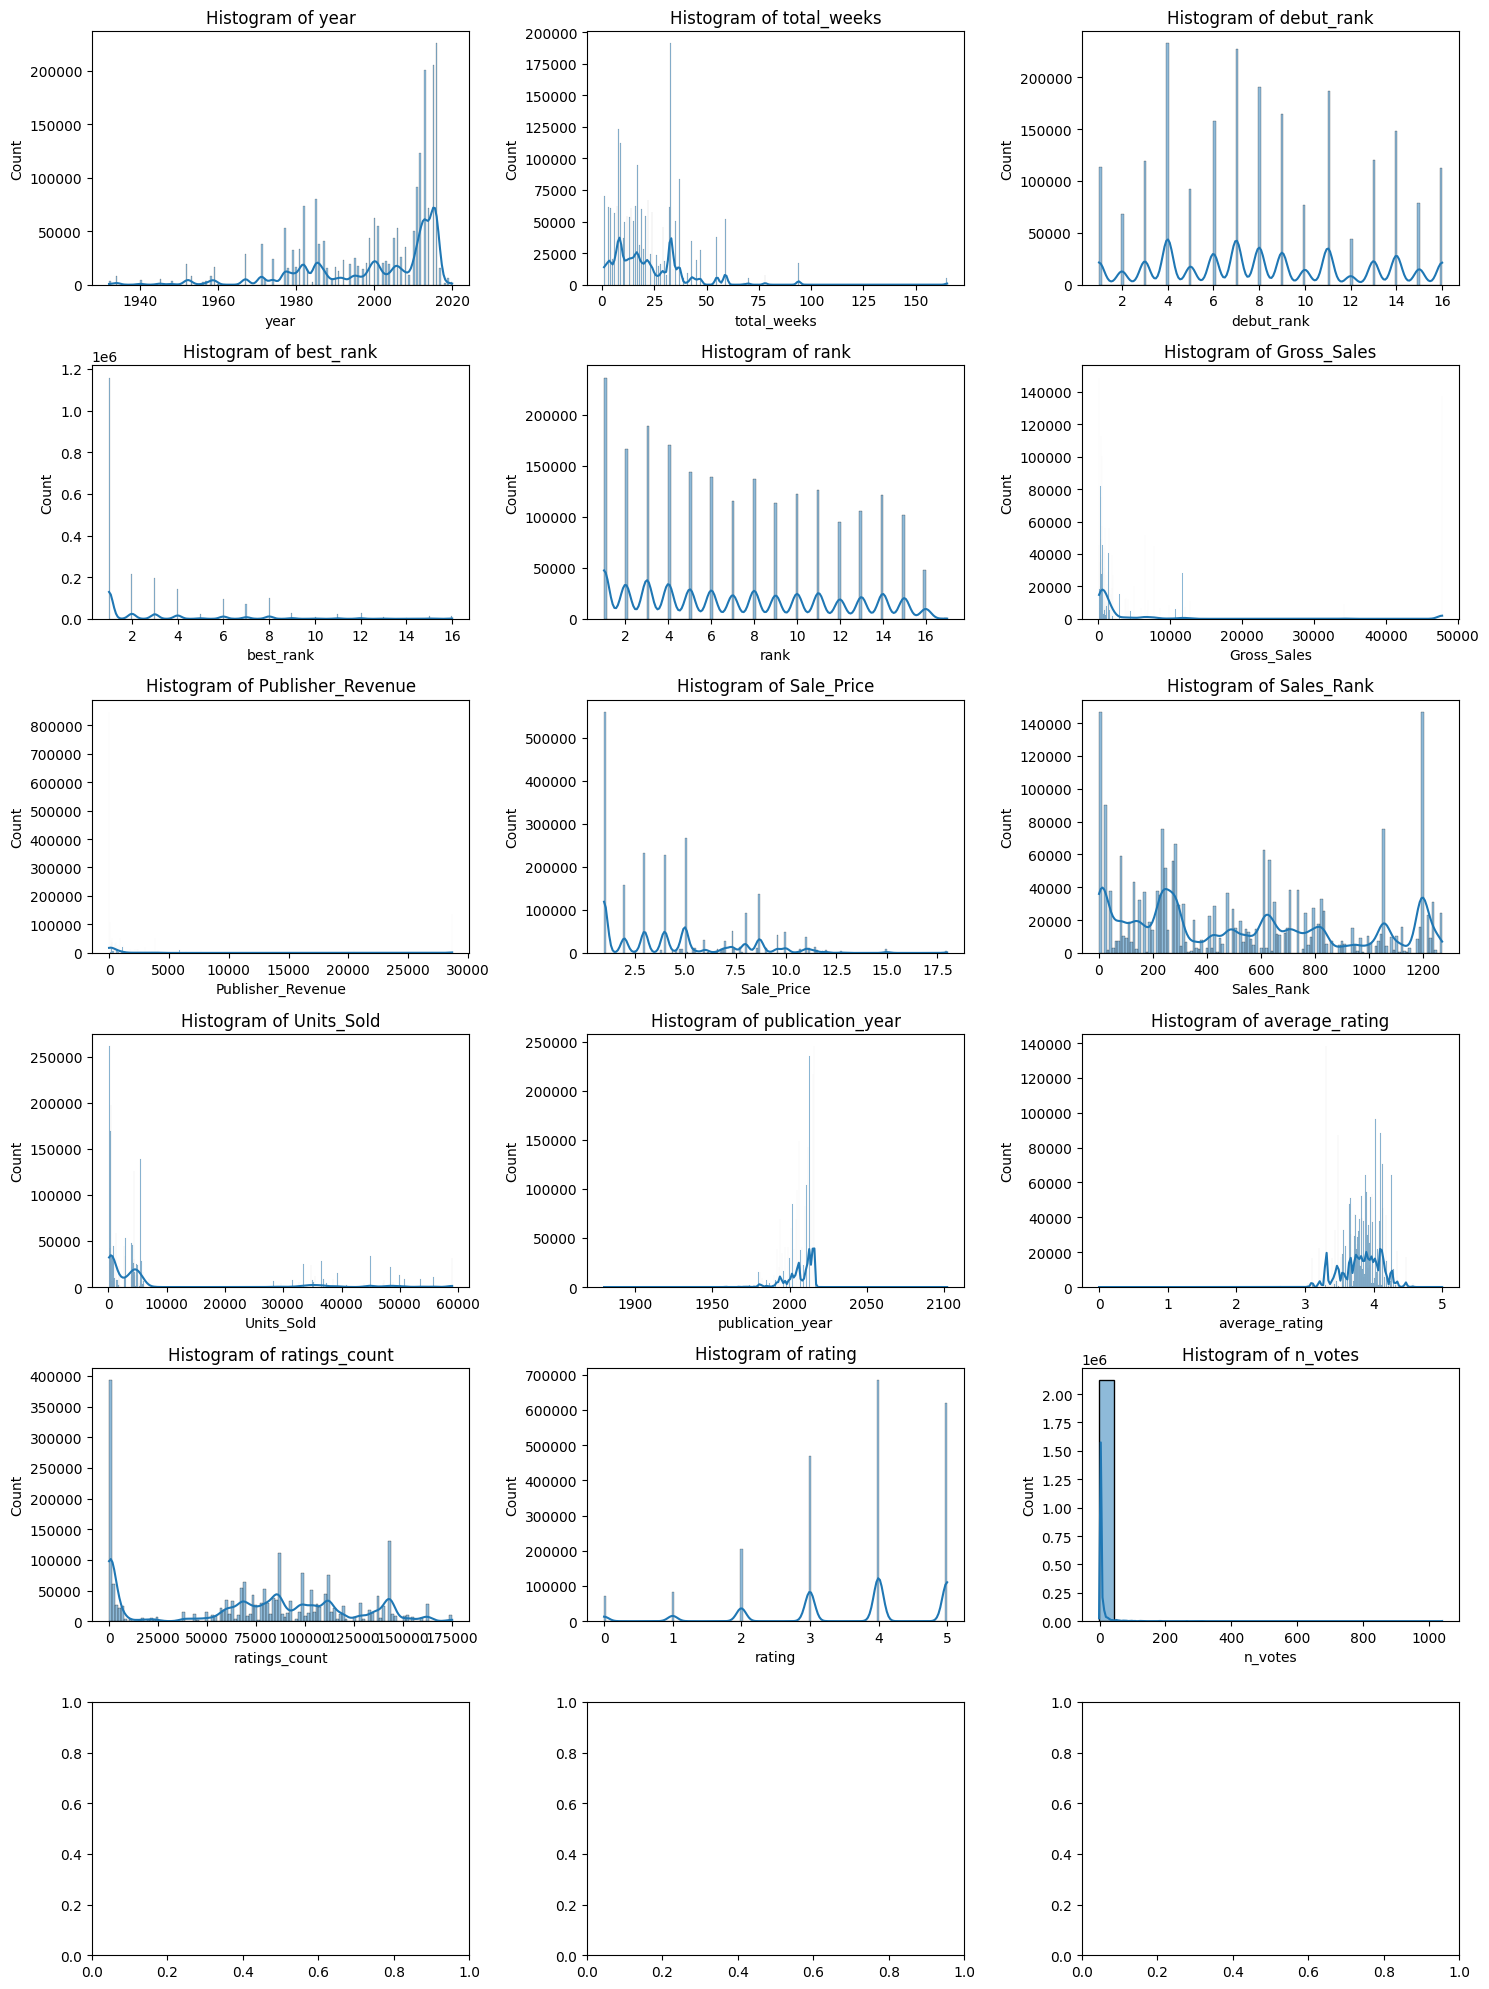

In [9]:
fig, axes = plt.subplots(len(num_cols)//3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

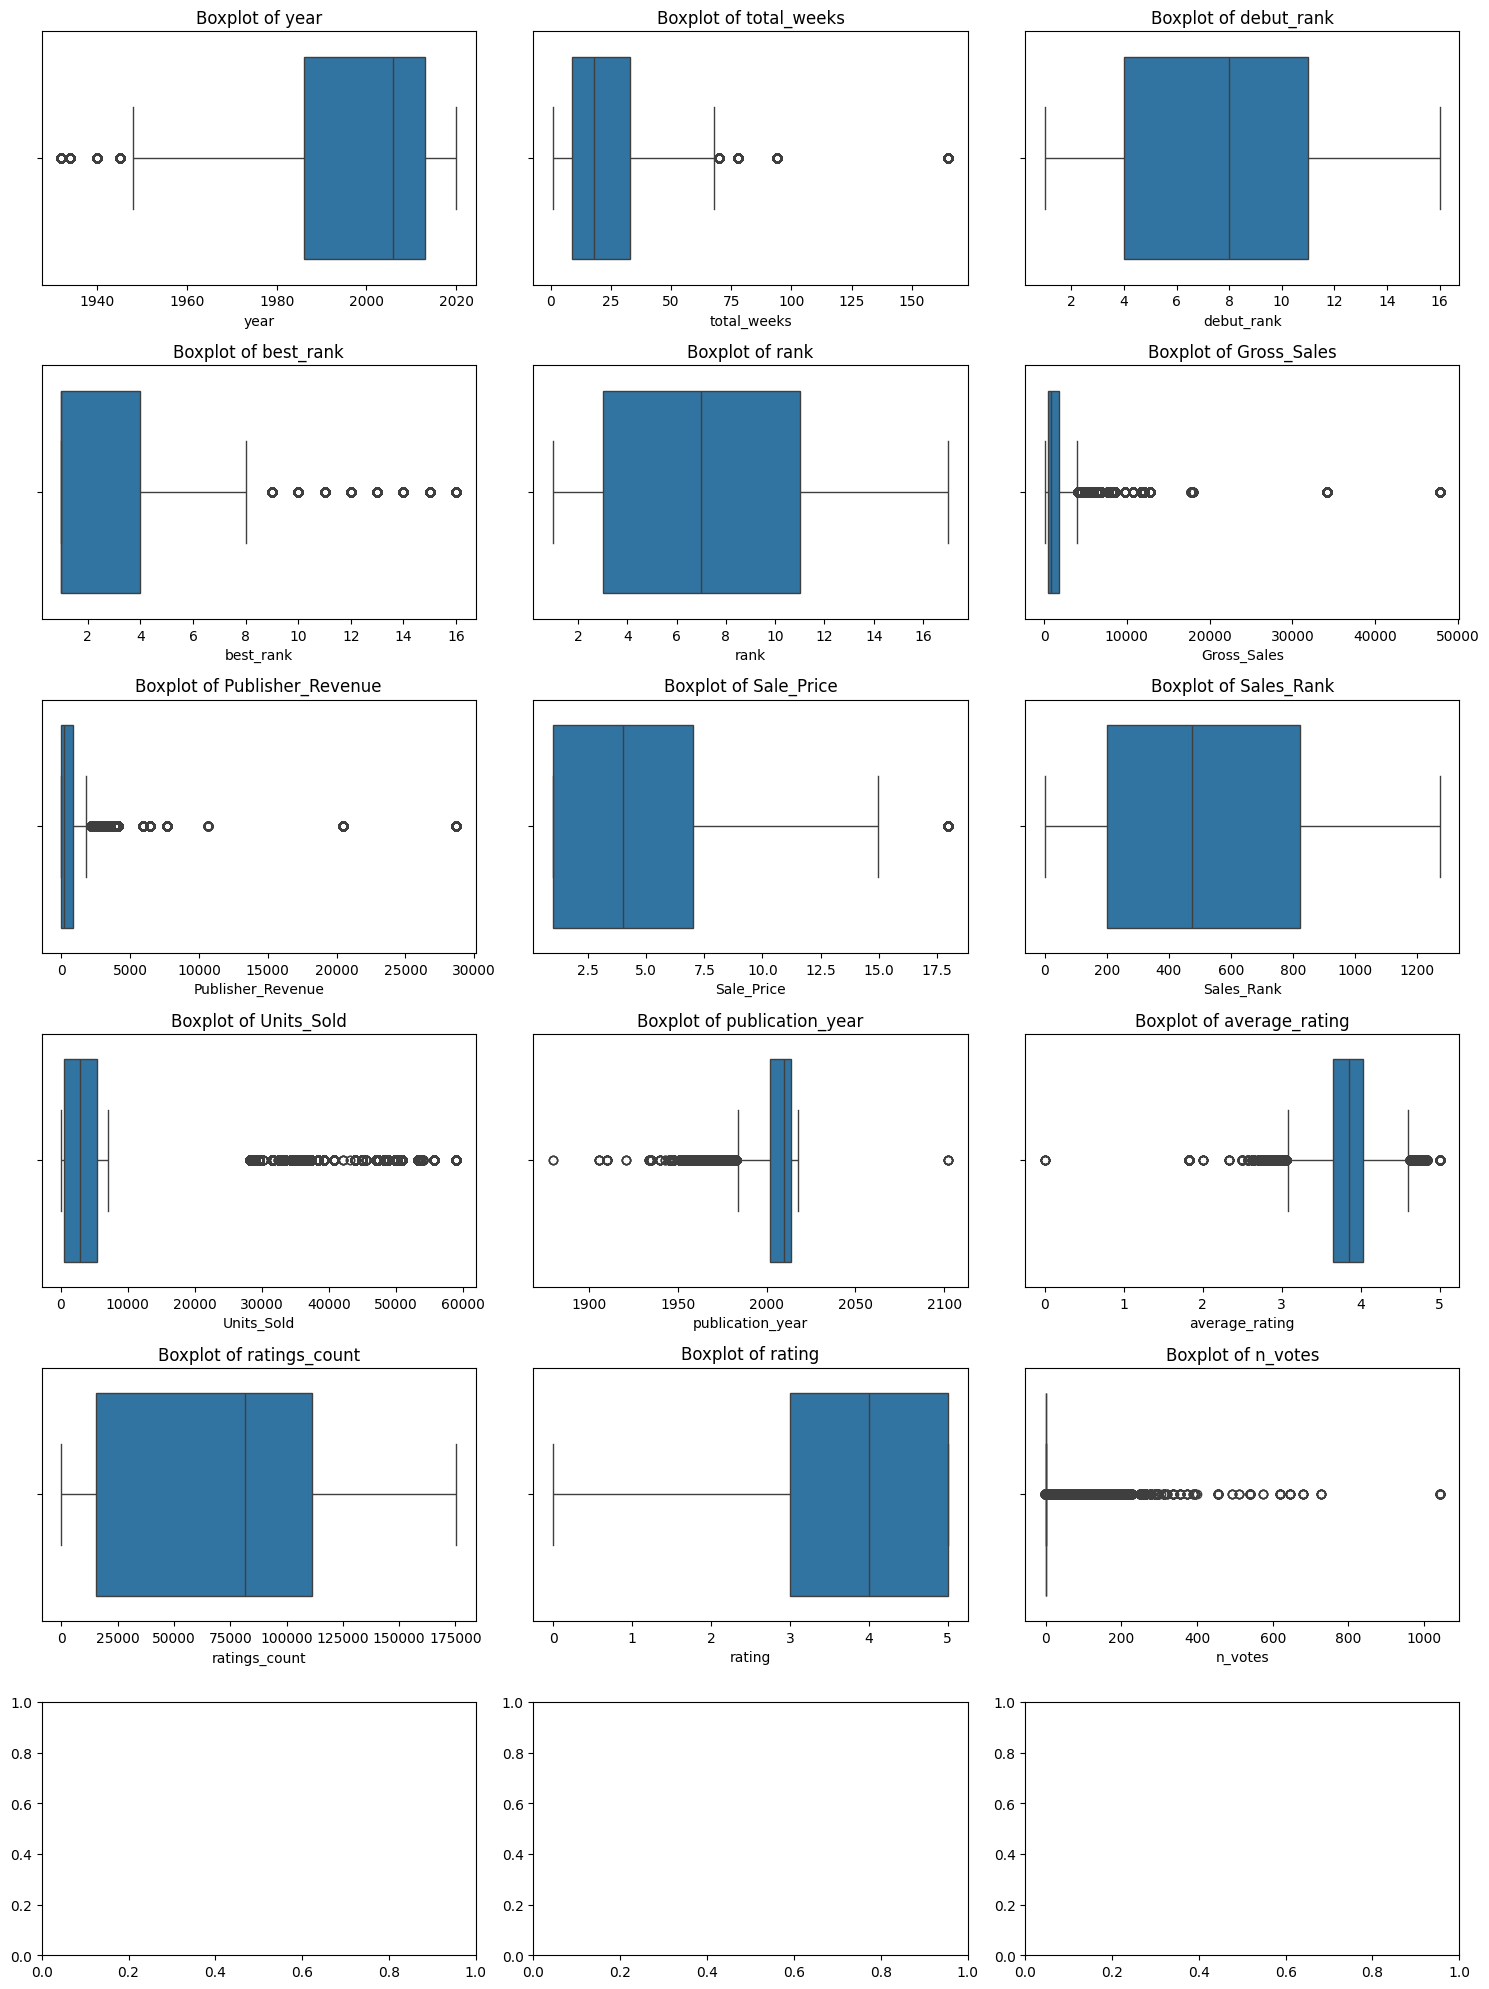

In [12]:
fig, axes = plt.subplots(len(num_cols)//3 + 1, 3, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

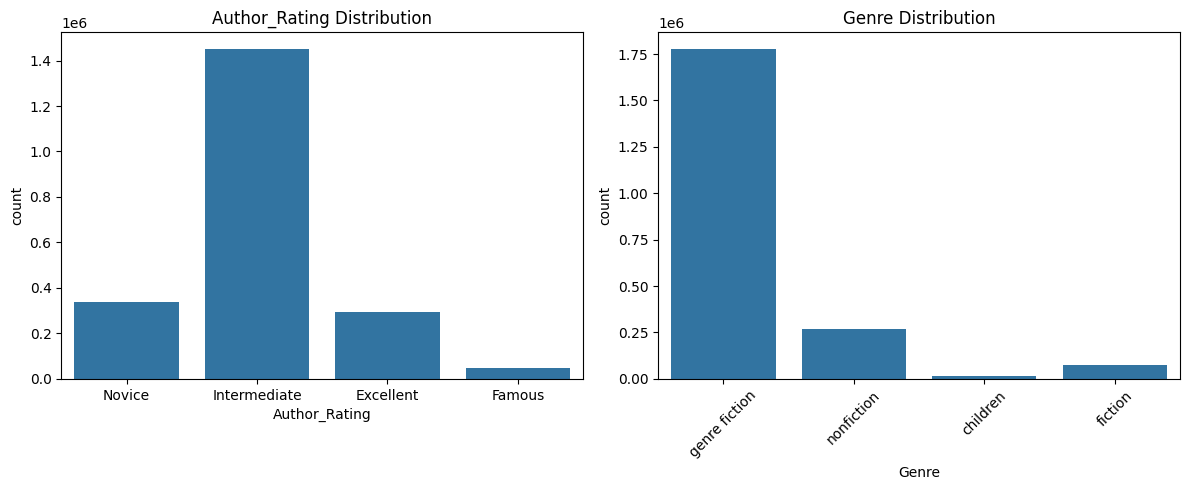

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=df, x='Author_Rating', ax=axes[0])
axes[0].set_title('Author_Rating Distribution')
sns.countplot(data=df, x='Genre', ax=axes[1])
axes[1].set_title('Genre Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
pairs = [('Units_Sold', 'average_rating'), ('Units_Sold', 'ratings_count'), 
         ('Units_Sold', 'total_weeks'), ('Gross_Sales', 'Sale_Price'), 
         ('n_votes', 'rating')]

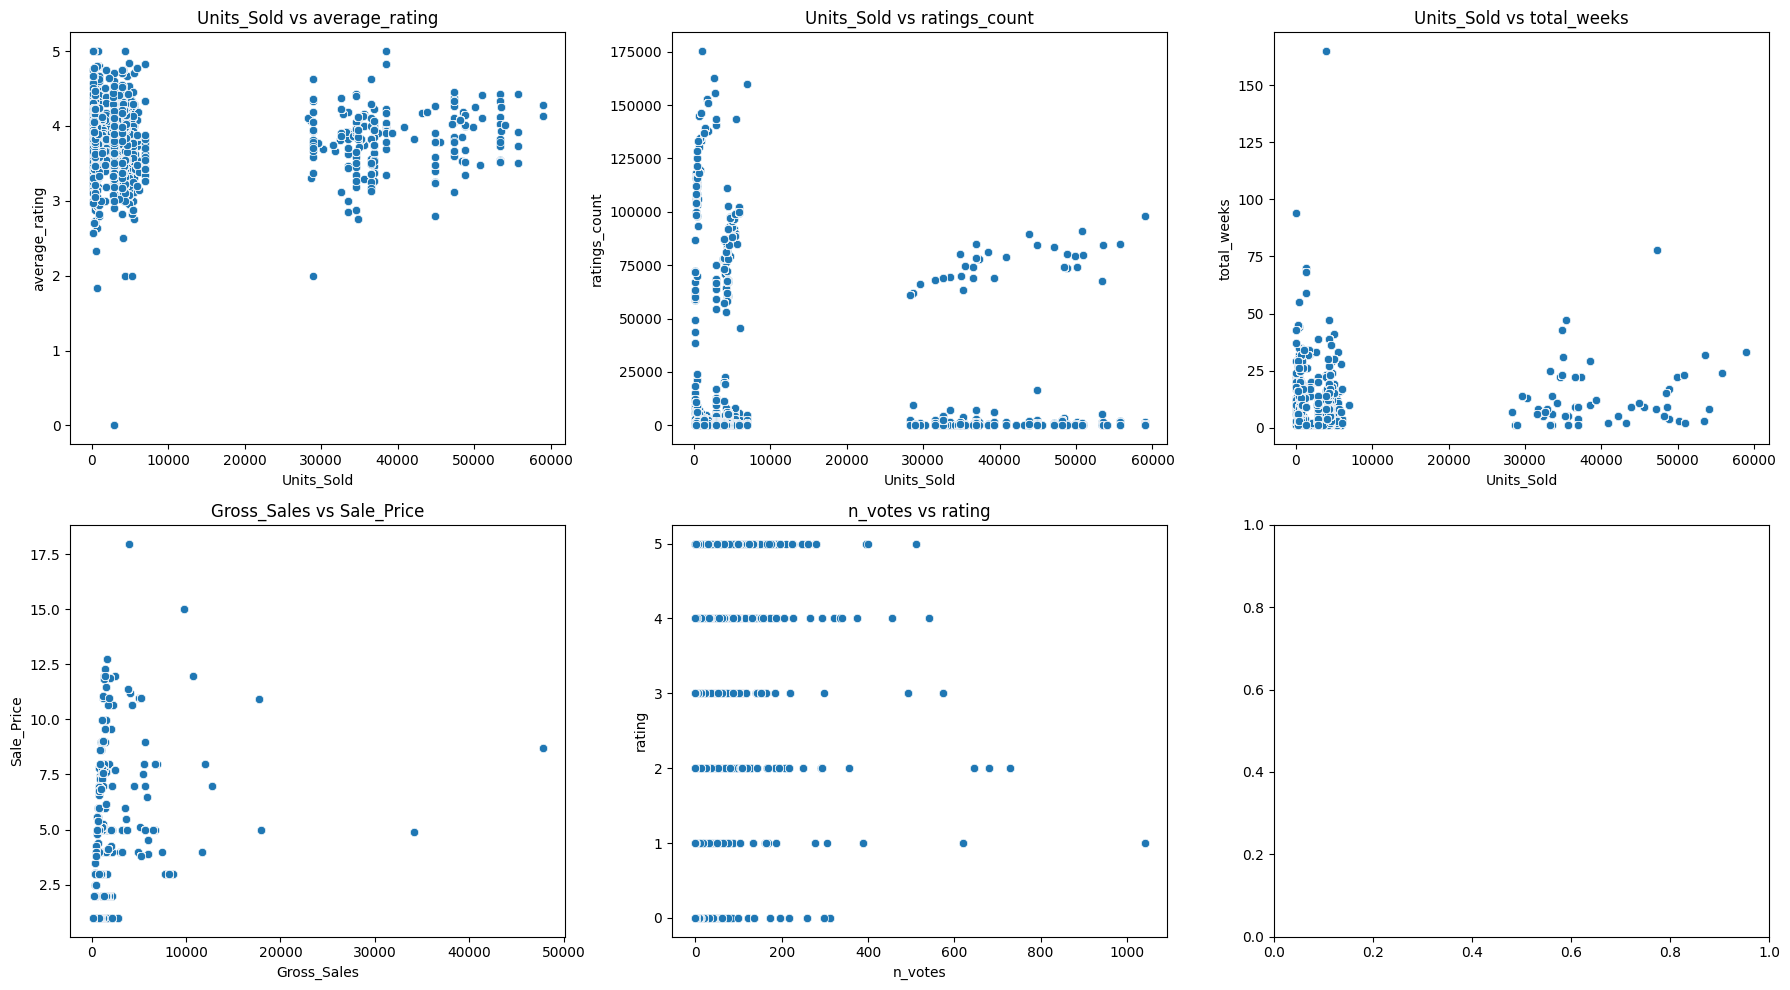

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for i, (x, y) in enumerate(pairs):
    sns.scatterplot(data=df, x=x, y=y, ax=axes[i])
    axes[i].set_title(f'{x} vs {y}')
plt.tight_layout()
plt.show()

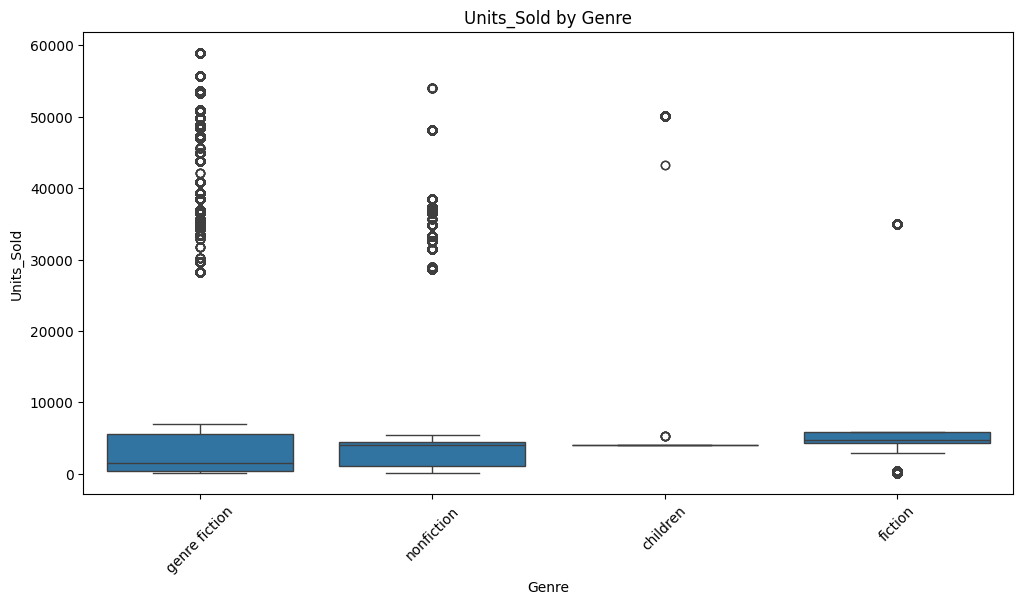

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Units_Sold')
plt.title('Units_Sold by Genre')
plt.xticks(rotation=45)
plt.show()

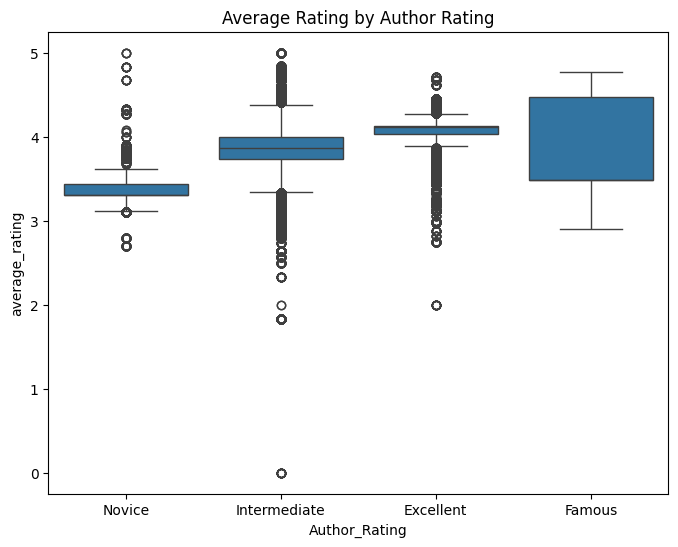

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Author_Rating', y='average_rating')
plt.title('Average Rating by Author Rating')
plt.show()

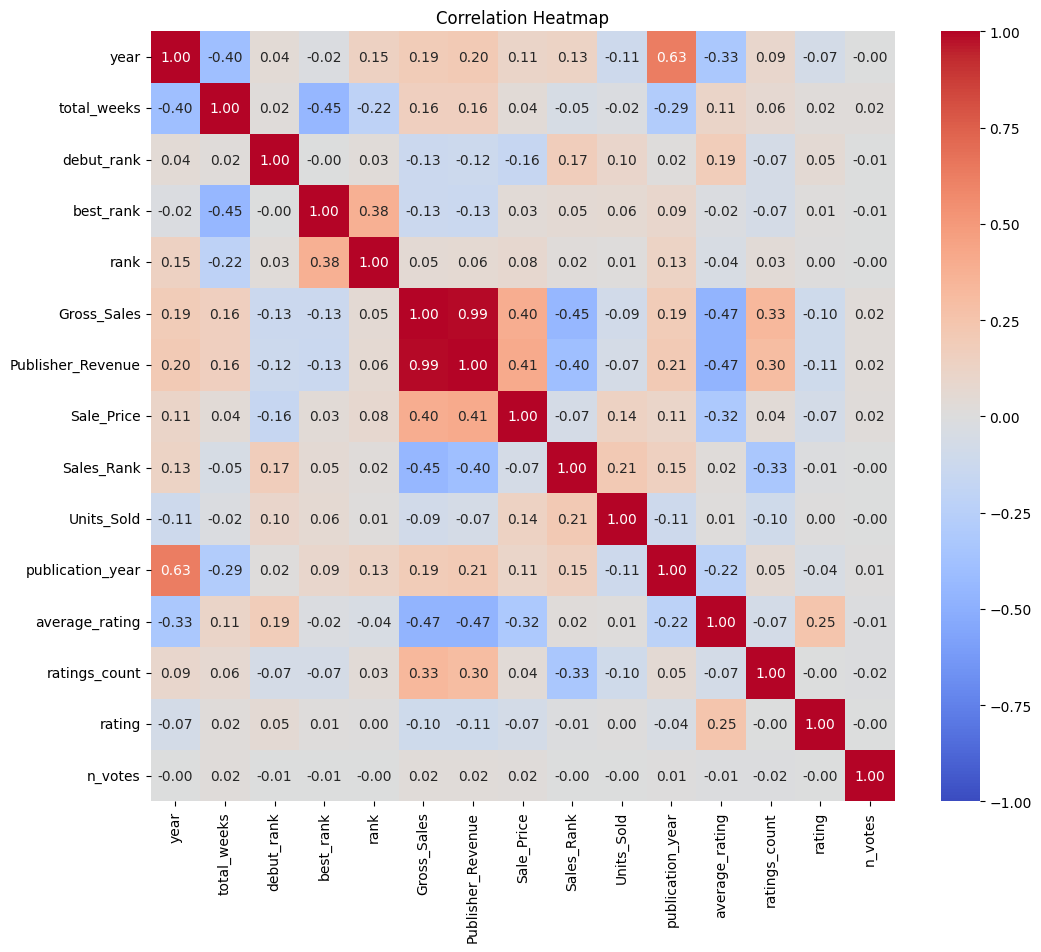

In [21]:
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

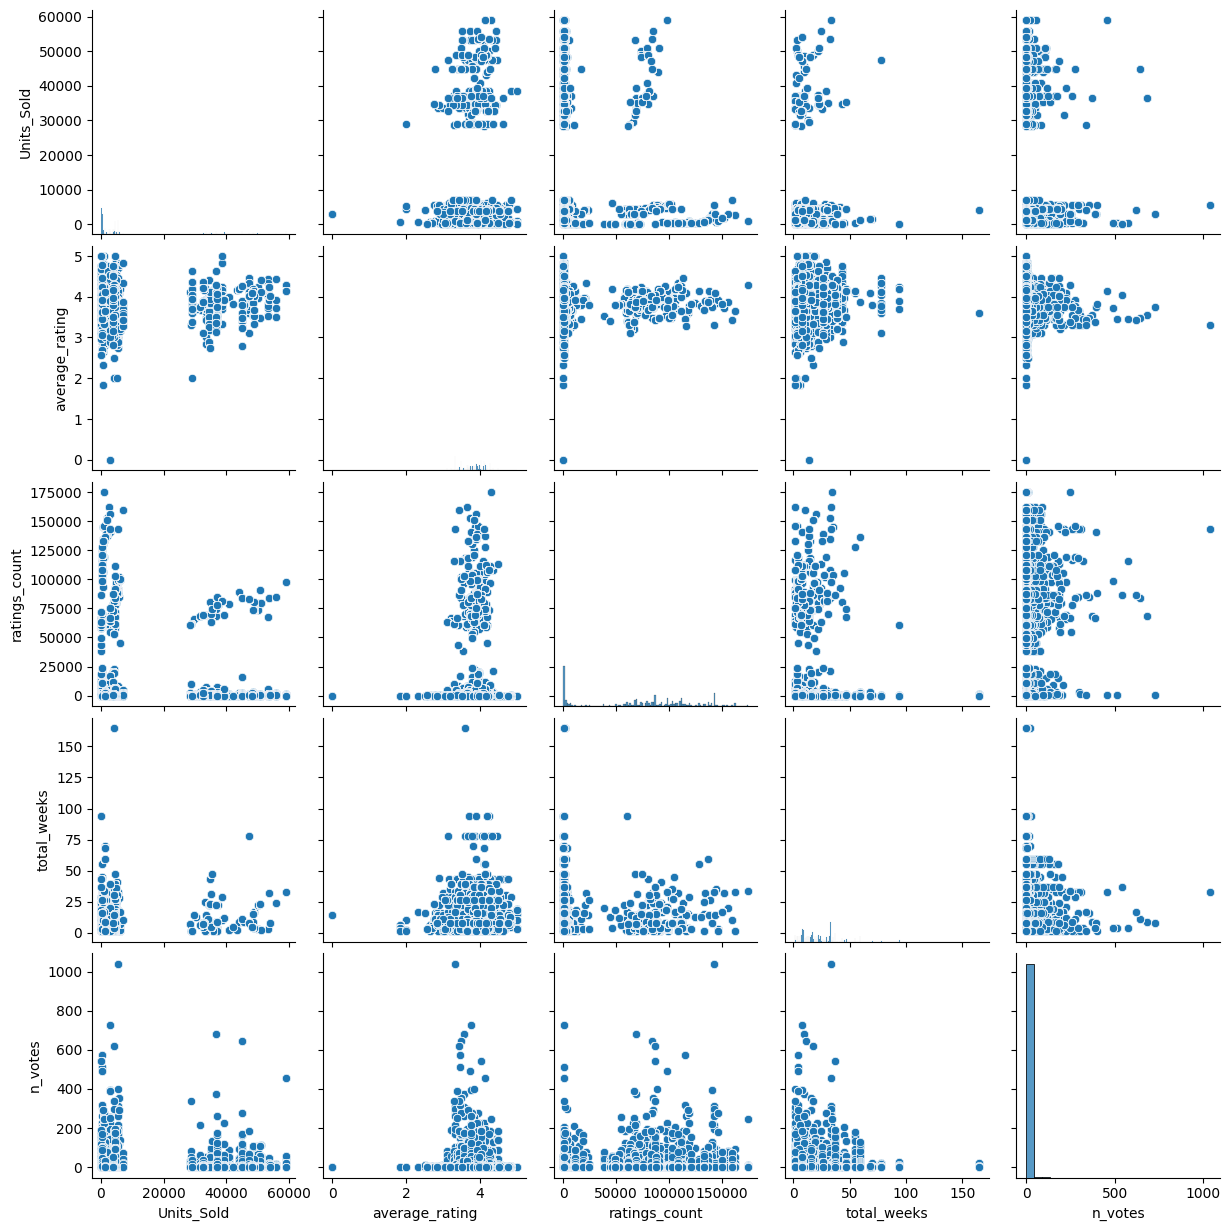

In [20]:
sns.pairplot(df[['Units_Sold', 'average_rating', 'ratings_count', 'total_weeks', 'n_votes']])
plt.show()

In [11]:
print("\nInsights from Groupby:")
print(df.groupby('Genre')['Units_Sold'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
print("\n")
print(df.groupby('Author_Rating')['average_rating'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))


Insights from Groupby:
                       mean  median    count
Genre                                       
children       10057.230547  4023.0    16283
genre fiction   8864.145153  1507.0  1777860
fiction         7533.633350  4779.0    71995
nonfiction      5699.961884  4077.0   267106


                   mean  median    count
Author_Rating                           
Excellent      4.069754    4.11   294925
Famous         3.873819    3.48    47325
Intermediate   3.873319    3.87  1451489
Novice         3.364361    3.31   339505


In [22]:
df['Genre'].unique()

array(['genre fiction', 'nonfiction', 'children', 'fiction'], dtype=object)